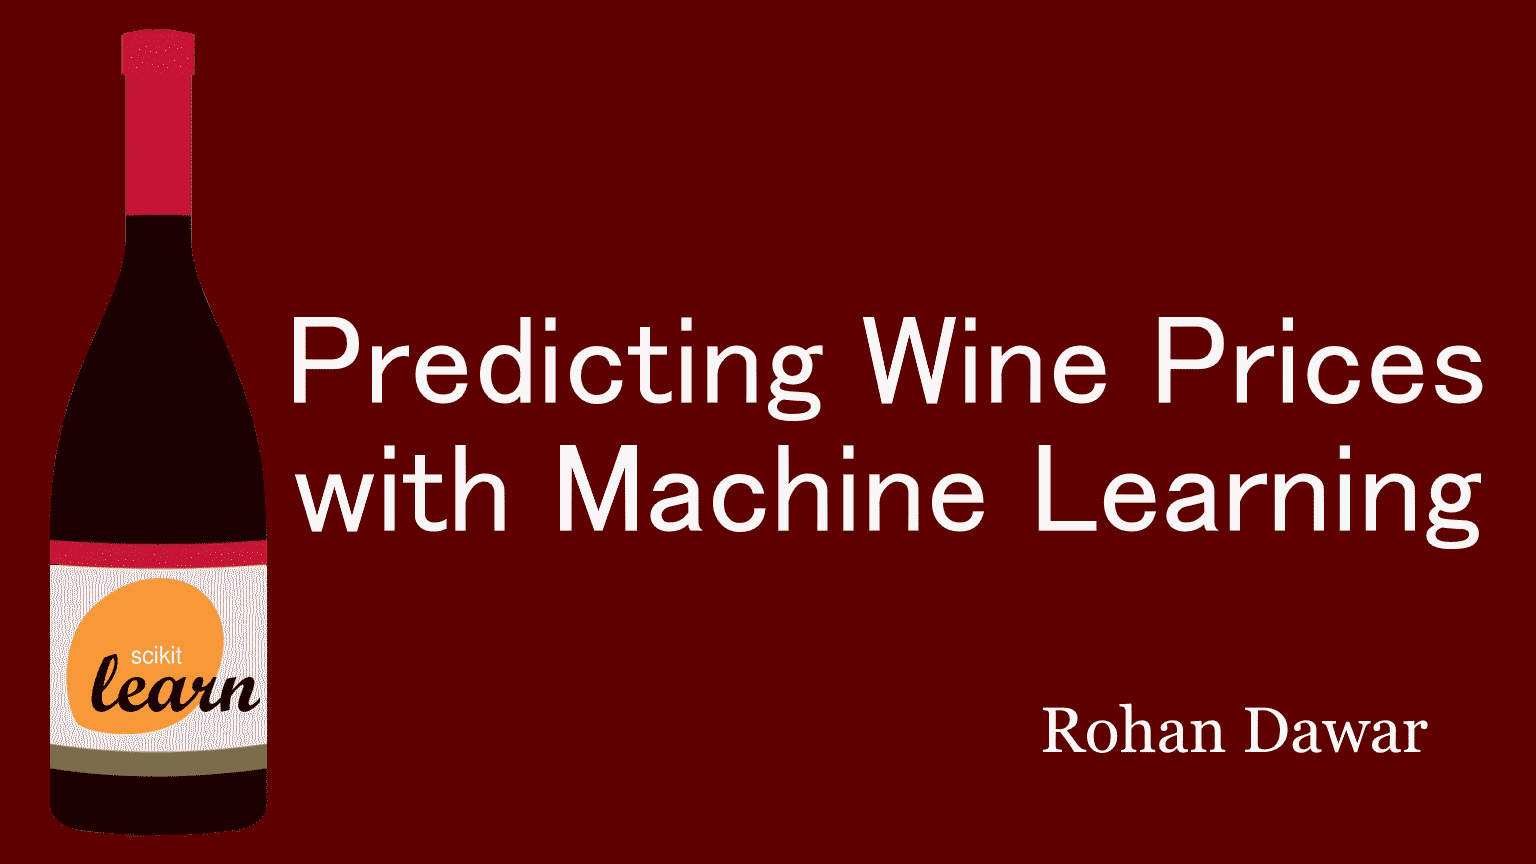

# Predicting Wine Prices with Machine Learning


*   In this project, I will be building a Machine Learning model to predict the price of wine (bottle) based on this [wine reviews kaggle dataset](https://www.kaggle.com/zynicide/wine-reviews), which itself is scraped from [WineEnthusiast](https://www.winemag.com/)


---

### Author: Rohan Dawar

### dawar.rohan1@gmail.com

### [Website](https://www.rohandawar.com)

### [Github](https://github.com/Rohan-Dawar/)

### [Jovian](https://jovian.ai/rohan-dawar)

LinkedIn


# **Outline**

## 1. [Downloading The Dataset, OpenDatasets](#1)

## 2. [Data Cleaning](#2)

## 3. [Creating Word Columns](#3)

## 4. [Scaling](#4)

## 5. [Identifying Inputs & Targets](#5)

## 6. [Encoding](#6)

## 7. [Data Analysis](#7)

## 8. [Train Test Val Split](#8)

## 9. [Baseline Models](#9)

## 10. [Ridge Regression](#10)

## 11. [Ridge Regression Log](#11)

## 12. [Lasso Regression](#12)

## 13. [Lasso Regression Log](#13)

## 14. [Decision Tree Regression](#14)

## 15. [Decision Tree Regression Log](#15)

## 16. [Random Forest](#16)

## 17. [Random Forest Log](#17)

## 18. [Gradient Boosting](#18)

## 19. [Gradient Boosting Log](#19)

<a name='1' id='1'></a>

---

# Downloading the Dataset, OpenDatasets

In [ ]:
# Install Dependencies
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/zynicide/wine-reviews/'

In [ ]:
# Provide your Kaggle Username and API Key:

od.download(dataset_url)

Skipping, found downloaded files in "./wine-reviews" (use force=True to force download)


In [ ]:
# Read dataset into pandas dataframe
# If not using Google Colab, you may need to change the URL path to the csv
import pandas as pd
df = pd.read_csv('/content/wine-reviews/winemag-data_first150k.csv')

<a name='2' id='2'></a>

---

# Data Cleaning

##### In this section I drop all rows without price and fill the rows without country data from the country of the same winery, lastly I drop Unnamed column

In [ ]:
# Drop rows without price
dfP = df[df['price'].notnull()]
len(dfP)

137235

In [ ]:
# Fill geodata from those with same winery
for i in dfP[dfP['country'].isnull()].index:
  row = dfP.loc[i]
  wineryDF = dfP[dfP['winery'] == row['winery']]
  try:
    country = wineryDF['country'].dropna().unique()[0]
    province = wineryDF['province'].dropna().unique()[0]
    region_1 = wineryDF['country'].unique()[0]
    region_2 = wineryDF['country'].unique()[0]

    dfP.at[i, 'country'] = country
    dfP.at[i, 'province'] = province
    dfP.at[i, 'region_1'] = region_1
    dfP.at[i, 'region_2'] = region_2
  except (TypeError, IndexError):
    pass

In [ ]:
# Check if any null countries
dfP[dfP['country'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1440,1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ


In [ ]:
# Fill Turkey
dfP.at[1440, 'country'] = 'Turkey'

In [ ]:
# Drop useless columns
if 'Unnamed: 0' in dfP.columns:
  dfP = dfP.drop(columns=['Unnamed: 0'])

In [ ]:
# Check Data types
dfP.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

<a name='3' id='3'></a>

---

# Creating Word Columns

##### Using the description column, we can count the most common words, and use those to create new columns if the description contains those words

In [ ]:
from collections import Counter

In [ ]:
dfP['description'] = dfP['description'].astype(str)

In [ ]:
c = Counter(" ".join(dfP["description"]).split()).most_common(500)
c

[('and', 374829),
 ('the', 186634),
 ('a', 169783),
 ('of', 168535),
 ('with', 135402),
 ('is', 98393),
 ('in', 66676),
 ('this', 65488),
 ('to', 58673),
 ('wine', 52317),
 ('The', 49669),
 ('flavors', 43816),
 ('but', 41564),
 ('on', 40780),
 ('that', 39288),
 ('it', 36877),
 ('This', 34129),
 ('fruit', 32623),
 ('A', 27056),
 ('for', 26895),
 ('aromas', 24901),
 ('are', 24749),
 ('from', 24137),
 ('by', 23564),
 ('has', 23281),
 ("It's", 22635),
 ('black', 21398),
 ('finish.', 19490),
 ('cherry', 18866),
 ('It', 18738),
 ('flavors.', 18533),
 ('palate', 18197),
 ('as', 18197),
 ('its', 18116),
 ('an', 17402),
 ('ripe', 16527),
 ('tannins', 16025),
 ('red', 15925),
 ("it's", 15073),
 ('acidity', 15028),
 ('Drink', 14254),
 ('sweet', 13368),
 ('notes', 13334),
 ('wine,', 12505),
 ('some', 12397),
 ('good', 12333),
 ('spice', 12268),
 ('rich', 12116),
 ('finish', 12061),
 ('berry', 11861),
 ('or', 11837),
 ('very', 11546),
 ('shows', 11325),
 ('more', 11204),
 ('blend', 10966),
 ('at', 

### Manual Wordcloud:

In [ ]:
# Adjectives, descriptors or aroma notes from the above counter:
wordcloud = [
             'fruit',
             'flavors',
             'aromas',
             'black',
             'finish',
             'cherry',
             'ripe',
             'palate',
             'tannins',
             'red',
             'acidity',
             'sweet',
             'notes',
             'spice',
             'rich',
             'berry',
             'blend',
             'dry',
             'white',
             'oak',
             'soft',
             'plum',
             'green',
             'crisp',
             'vanilla',
             'blackberry',
             'nose',
             'citrus',
             'apple',
             'bright',
             'chocolate',
             'raspberry',
             'light',
             'full',
             'firm',
             'spicy',
             'dried',
             'balanced',
             'peach',
             'rich',
             'pepper',
             'herbal',
             'mineral',
             'smooth',
             'hint',
             'creamy',
             'tannic',
             'pear',
             #'imported',
             'wood',
             'lemon',
             'structure',
             'clean',
             'mouth',
             'smoky',
             'mouthfeel',
             'elegant',
             'tart',
             'sweet',
             'cherries',
             'pretty',
             'complex',
             'toast',
             #'open',
             'nice',
             'character',
             'currant',
             'wild',
             'plenty',
             'balance',
             'orange',
             'tropical',
             'cassis',
             'easy',
             'showing',
             'concentrated']

In [ ]:
# most common descriptive words:
mostCommonDesciptors = {x:dict(c)[x] for x in wordcloud}
worddf = pd.DataFrame(mostCommonDesciptors, index=[0]).T.reset_index().rename(columns={'index':'word',0:'count'}).sort_values(by='count', ascending=False)
worddf

,word,count
1,flavors,43816
0,fruit,32623
2,aromas,24901
3,black,21398
5,cherry,18866
...,...,...
63,wild,3492
69,easy,3426
70,showing,3276
71,concentrated,3177


In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(worddf.head(15), x='count', y='word', orientation='h', text='count', title='Most Common Descriptive Words', color_discrete_sequence=['darkred'])
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Word')

In [ ]:
import numpy as np

In [ ]:
# Creating WORD columns, 1 if word appears in description, 0 if not
for word in wordcloud:
  colname = f'WORD: {word}'
  dfP[colname] = np.where(dfP['description'].str.contains(word, case=False, na=False), 1, 0)

<a name='4' id='4'></a>

---

# Scaling

In [ ]:
# All Points Are in Range [80,100], so we can scale them to range [0,1]

dfP['points'].describe()

count    137235.000000
mean         87.787919
std           3.221680
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [ ]:
def PointsToPCT(point):
  return (point-80)/20

In [ ]:
dfP['points'] = dfP['points'].apply(PointsToPCT)

In [ ]:
dfP['points'].describe()

count    137235.000000
mean          0.389396
std           0.161084
min           0.000000
25%           0.300000
50%           0.400000
75%           0.500000
max           1.000000
Name: points, dtype: float64

# Mean Target Encoding

In [ ]:
dfP['region_1'].nunique()

1198

In [ ]:
dfP['region_2'].nunique()

19

In [ ]:
dfP['winery'].nunique()

13852

In [ ]:
dfP['designation'].nunique()

28346

In [ ]:
def MeanTargetEncode(x, col):
  meanVal = dfP[dfP[col]==x]['price'].mean()
  return meanVal

In [ ]:
# List of columns to mean target encode, these are the columns that either have too many unique values or are too sparse to one-hot encode
MTEcols = ['region_1', 'region_2', 'winery', 'designation']

In [ ]:
# Mean Target Encode All Columns:
for c in MTEcols:
  newcol = f'MTE: {c}'
  dfP[newcol] = dfP[c].apply(lambda x : MeanTargetEncode(x, c))
  print(f"Mean Target Encoded {c}")

Mean Target Encoded region_1
Mean Target Encoded region_2
Mean Target Encoded winery
Mean Target Encoded designation


In [ ]:
# Fill all NaN MTE Cols with the MTE of Country Col
for col in dfP.filter(like='MTE: ').columns:
  nans = dfP[dfP[col].isnull()]
  nans[col] = nans['country'].apply(lambda x : MeanTargetEncode(x, 'country'))
  dfP[col].fillna(nans[col], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# There are no NaN values for Mean Target Encoded Cols:
dfP.filter(like='MTE: ').isnull().sum()

In [ ]:
def groupbyMTE(col):
  mtecol = f'MTE: {col}'
  gbdf = dfP.groupby([col, 'country', mtecol]).count().reset_index()[[col, 'country', mtecol]].sort_values(by=mtecol, ascending=False).reset_index(drop=True)
  return gbdf

In [ ]:
# MTEs for Region 1
groupbyMTE('region_1').to_csv('MTE_region1.csv')
groupbyMTE('region_1')

,region_1,country,MTE: region_1
0,Montrachet,France,601.181818
1,Romanée-St.-Vivant,France,545.000000
2,Mazoyeres-Chambertin,France,475.000000
3,Chevalier-Montrachet,France,438.263158
4,Grands-Echezeaux,France,391.000000
...,...,...,...
1193,Riviera Ligure di Ponente,Italy,8.333333
1194,Vin de Pays de l'Ile de Beauté,France,8.000000
1195,Australia-New Zealand,Australia,8.000000
1196,Gers,France,7.000000


In [ ]:
import plotly.express as px

In [ ]:
def PlotTopBottom(df, t, yaxisname, legendx=.4):
  top = df.head(10)
  top['isTop'] = 1
  bot = df.tail(10)
  bot['isTop'] = 0
  series = top.append(bot)
  #print(series)
  namcol = series.select_dtypes('object').columns[0]
  valcol = series.select_dtypes('float64').columns[0]
  vcround = series.select_dtypes('float64').apply(lambda x : round(x, 2))
  fig = px.bar(series, x=valcol, y=namcol,  orientation='h', title=t, text=vcround, color='country').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
  fig.update_layout(yaxis={'categoryorder':'total ascending'}, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=legendx
))
  #fig.add_hline(y=0.9)
  fig.update_xaxes(title='Mean Target Value ($)')
  fig.update_yaxes(title=yaxisname)
  fig.update_coloraxes
  return fig

In [ ]:
PlotTopBottom(groupbyMTE('region_1'), 'Top and Bottom 10 Mean Target Values for Region 1', 'Region 1', legendx=0.53)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#MTEs for region 2
groupbyMTE('region_2').to_csv('MTE_region2.csv')
groupbyMTE('region_2')

,region_2,country,MTE: region_2
0,Napa,US,54.140807
1,South Coast,US,37.065657
2,Willamette Valley,US,36.677827
3,Sonoma,US,36.276440
4,Napa-Sonoma,US,35.769324
5,Central Coast,US,31.708709
6,Columbia Valley,US,29.705785
7,Mendocino/Lake Counties,US,29.326069
8,Oregon Other,US,28.060698
9,North Coast,US,26.893819


In [ ]:
# MTEs for Winery:
groupbyMTE('winery').to_csv('MTE_winery.csv')
PlotTopBottom(groupbyMTE('winery'), 'Top and Bottom 10 Mean Target Values for Winery', 'Winery', legendx=0.53)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# MTEs for Designation:
groupbyMTE('designation').to_csv('MTE_designation.csv')
PlotTopBottom(groupbyMTE('designation'), 'Top and Bottom 10 Mean Target Values for Designation', 'Designation', legendx=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Mean Prices of Countries:
countryMeans = dfP.groupby('country')['price'].mean().sort_values(ascending=False)
countryMeans.to_csv('MTE_country.csv')
countryMeans

country
US-France                 50.000000
England                   47.500000
France                    45.619885
Hungary                   44.204348
Luxembourg                40.666667
Germany                   39.011078
Italy                     37.547913
Canada                    34.628866
US                        33.653808
Israel                    31.304918
Australia                 31.258480
Austria                   31.192106
Mexico                    29.095238
Slovenia                  28.061728
Spain                     27.048529
Switzerland               26.500000
Portugal                  26.332615
Turkey                    25.882353
Uruguay                   25.847059
Lebanon                   25.432432
Serbia                    24.285714
New Zealand               24.173290
Japan                     24.000000
Croatia                   23.108434
Greece                    21.742268
South Africa              21.130532
Argentina                 20.794881
China               

<a name='5' id='5'></a>

---

# Identifying Inputs & Targets

In [ ]:
# Manual CSV Upload:
# change manualUplaod to True if uploading the CSV of dfP manually :

manualUpload = True

import pandas as pd

if manualUpload:
  dfP = pd.read_csv('/content/dfP.csv').drop(columns=['Unnamed: 0'])
  dfP

In [ ]:
# Input Columns:
input_cols = list(dfP.columns)

In [ ]:
def remove_from_inputs(listOfIN):
  for input in listOfIN:
    if input in input_cols:
      input_cols.remove(input)

In [ ]:
# List Of Columns to remove from inputs:
removeL = ['price', 'region_1', 'region_2', 'winery', 'description', 'designation']
remove_from_inputs(removeL)
inputs_df = dfP[input_cols].copy()

In [ ]:
# Target Column = Price
target_col = 'price'
targets = dfP[target_col]

In [ ]:
# Make LogTargets the Logarithm of Price, for Log Models:
import math
LogTargets = dfP['price'].apply(math.log)

In [ ]:
# Scaling MTES
from sklearn.preprocessing import MinMaxScaler
MTEpostcols = list(dfP.filter(like='MTE: ').columns)
scaler = MinMaxScaler().fit(inputs_df[MTEpostcols])
inputs_df[MTEpostcols] = scaler.transform(inputs_df[MTEpostcols])

In [ ]:
# Numeric and Categorical Inputs:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['points',
 'WORD: fruit',
 'WORD: flavors',
 'WORD: aromas',
 'WORD: black',
 'WORD: finish',
 'WORD: cherry',
 'WORD: ripe',
 'WORD: palate',
 'WORD: tannins',
 'WORD: red',
 'WORD: acidity',
 'WORD: sweet',
 'WORD: notes',
 'WORD: spice',
 'WORD: rich',
 'WORD: berry',
 'WORD: blend',
 'WORD: dry',
 'WORD: white',
 'WORD: oak',
 'WORD: soft',
 'WORD: plum',
 'WORD: green',
 'WORD: crisp',
 'WORD: vanilla',
 'WORD: blackberry',
 'WORD: nose',
 'WORD: citrus',
 'WORD: apple',
 'WORD: bright',
 'WORD: chocolate',
 'WORD: raspberry',
 'WORD: light',
 'WORD: full',
 'WORD: firm',
 'WORD: spicy',
 'WORD: dried',
 'WORD: balanced',
 'WORD: peach',
 'WORD: pepper',
 'WORD: herbal',
 'WORD: mineral',
 'WORD: smooth',
 'WORD: hint',
 'WORD: creamy',
 'WORD: tannic',
 'WORD: pear',
 'WORD: imported',
 'WORD: wood',
 'WORD: lemon',
 'WORD: structure',
 'WORD: clean',
 'WORD: mouth',
 'WORD: smoky',
 'WORD: mouthfeel',
 'WORD: elegant',
 'WORD: tart',
 'WORD: cherries',
 'WORD: pretty',
 'WORD: 

In [ ]:
categorical_cols = inputs_df.select_dtypes(include=['object',]).columns.tolist()
categorical_cols

['country', 'province', 'variety']

<a name='6' id='6'></a>

---

# Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
categorical_cols

['country', 'province', 'variety']

In [ ]:
inputs_df[categorical_cols] = inputs_df[categorical_cols].fillna('Unknown')

In [ ]:
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1112

In [ ]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [ ]:
inputs_df

,country,points,province,variety,WORD: fruit,WORD: flavors,WORD: aromas,WORD: black,WORD: finish,WORD: cherry,WORD: ripe,WORD: palate,WORD: tannins,WORD: red,WORD: acidity,WORD: sweet,WORD: notes,WORD: spice,WORD: rich,WORD: berry,WORD: blend,WORD: dry,WORD: white,WORD: oak,WORD: soft,WORD: plum,WORD: green,WORD: crisp,WORD: vanilla,WORD: blackberry,WORD: nose,WORD: citrus,WORD: apple,WORD: bright,WORD: chocolate,WORD: raspberry,WORD: light,WORD: full,WORD: firm,WORD: spicy,...,variety_Verduzzo Friulano,variety_Vermentino,variety_Vermentino Nero,variety_Vernaccia,variety_Vespaiolo,variety_Vidadillo,variety_Vidal,variety_Vidal Blanc,variety_Vignoles,variety_Vilana,variety_Vinhão,variety_Viognier,variety_Viognier-Chardonnay,variety_Viognier-Grenache Blanc,variety_Viognier-Marsanne,variety_Viognier-Roussanne,variety_Viognier-Valdiguié,variety_Vitovska,variety_Viura,variety_Viura-Chardonnay,variety_Viura-Sauvignon Blanc,variety_Viura-Verdejo,variety_Vranec,variety_Weissburgunder,variety_Welschriesling,variety_White Blend,variety_White Port,variety_White Riesling,variety_Xarel-lo,variety_Xinisteri,variety_Xinomavro,variety_Xynisteri,variety_Yapincak,variety_Zibibbo,variety_Zierfandler,variety_Zierfandler-Rotgipfler,variety_Zinfandel,variety_Zlahtina,variety_Zweigelt,variety_Žilavka
0,US,0.80,California,Cabernet Sauvignon,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Spain,0.80,Northern Spain,Tinta de Toro,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,US,0.80,California,Sauvignon Blanc,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,US,0.80,Oregon,Pinot Noir,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,France,0.75,Provence,Provence red blend,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137230,Italy,0.55,Southern Italy,White Blend,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137231,France,0.55,Champagne,Champagne Blend,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137232,Italy,0.55,Southern Italy,White Blend,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137233,France,0.50,Champagne,Champagne Blend,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<a name='7' id='7'></a>

---

# Data Analysis

In [ ]:
import plotly.express as px

In [ ]:
r = round(dfP['price'].corr(dfP['points']), 2)
fig = px.scatter(dfP, x='points', y='price', title=f'Bottle Price vs. Points (scaled), r={r}', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Points (scaled)')
fig.update_yaxes(title='Price')

In [ ]:
r = round(dfP['points'].corr(LogTargets), 2)
fig = px.scatter(x=dfP['points'], y=LogTargets, title=f'Bottle Log Price vs. Points (scaled), r={r}', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Points (scaled)')
fig.update_yaxes(title='Natural Logarithm of Price')

In [ ]:
fig = px.histogram(dfP, x='price', marginal='box', nbins=200, title='Distribution of Bottle Price', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Price')
fig.update_yaxes(title='Count')

In [ ]:
fig = px.histogram(dfP, x='price', marginal='box', log_x=True, title='Distribution of Bottle Price', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Price (log)')
fig.update_yaxes(title='Count')

In [ ]:
dfP.sort_values(by='price', ascending=False).head(10)

In [ ]:
fig = px.histogram(dfP, x='points', marginal='box', nbins=200, title='Distribution of Points', color_discrete_sequence=['darkred'])
fig.update_xaxes(title='Points (scaled)')
fig.update_yaxes(title='Count')

In [ ]:
topCountries = dfP['country'].value_counts().head(15)
fig = px.bar(x=topCountries.values, y=topCountries.index, orientation='h', title='Top Countries of Origin', color_discrete_sequence=['darkred'], text=topCountries.values)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Country')

In [ ]:
provCounts = dfP.groupby(['region_1', 'country']).count().reset_index().rename(columns={'description':'count'})[['region_1', 'country', 'count']].sort_values(by='count', ascending=False)
fig = px.bar(provCounts.head(15), x='count', y='region_1', color='country', orientation='h', title='Top Regions of Origin', text='count').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_layout(yaxis={'categoryorder':'total ascending'}, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.4
))
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Region 1')

In [ ]:
provCounts = dfP.groupby(['region_2', 'country', 'province']).count().reset_index().rename(columns={'description':'count'})[['region_2', 'country', 'province', 'count']].sort_values(by='count', ascending=False)
fig = px.bar(provCounts.head(15), x='count', y='region_2', orientation='h', title='Top Region 2 - U.S. Only', color='province', text='count').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_layout(yaxis={'categoryorder':'total ascending'}, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.54
))
fig.update_xaxes(title='Count')
fig.update_yaxes(title='Region 2')

In [ ]:
dfP['country'].value_counts().head(15).index

In [ ]:
# Top 15 Countries Price Distribution Quartiles:
dfcountry = dfP.groupby(['country', 'price']).count().reset_index()[['country', 'price']]
dfcountry2 = dfcountry[dfcountry['country'].isin(dfP['country'].value_counts().head(15).index)]
fig = px.box(dfcountry2, x="country", y="price", log_y=True, color_discrete_sequence=['darkred'], title='Top 15 Countries Price Distribution Quartiles')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Price (log scaled)')
fig.show()

In [ ]:
# Top 15 Varieties Price Distribution Quartiles:
dfvariety = dfP.groupby(['variety', 'price']).count().reset_index()[['variety', 'price']]
dfvariety2 = dfvariety[dfvariety['variety'].isin(dfP['variety'].value_counts().head(15).index)]
fig = px.box(dfvariety2, x="variety", y="price", log_y=True, color_discrete_sequence=['darkred'], title='Top 15 Varieties Price Distribution Quartiles')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(title='Grape Varietal')
fig.update_yaxes(title='Price (log scaled)')
fig.show()

In [ ]:
# Top 15 Varieties Price Distribution Quartiles:
dfprovince = dfP.groupby(['country', 'province', 'price']).count().reset_index()[['province', 'country', 'price']]
dfprovince2 = dfprovince[dfprovince['province'].isin(dfP['province'].value_counts().head(15).index)]
fig = px.box(dfprovince2, x="province", y="price", color='country', log_y=True, title='Top 15 Provinces Price Distribution Quartiles', notched=True).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_layout(xaxis={'categoryorder':'total descending'}, boxmode='overlay', showlegend=True, boxgap=0.1, boxgroupgap=0, legend=dict(orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.72))
fig.update_xaxes(title='Province (or State)')
fig.update_yaxes(title='Price (log scaled)')
fig.show()

<a name='8' id='8'></a>

---

# Train Test Val Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

<a name='9' id='9'></a>

---

# M0: Dumb Baseline: Mean & Random

In [ ]:
import time

In [ ]:
#  Model Performance Tracking DataFrame:
ModelPerformance = pd.DataFrame(columns=['Model', 'TrainRMSE', 'TrainMFE', 'ValRMSE', 'ValMFE', 'TimeToTrain'])
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain


In [ ]:
# Calculate Mean Fractional Error:
def mfe(targs, preds):
  d = {'Targs':targs,'Preds':preds}
  ddf = pd.DataFrame(d)
  pctchange = ddf.pct_change(axis='columns')['Preds']
  abspctchange = pctchange.apply(abs)
  return abspctchange.mean()

In [ ]:
# Dumb Mean Model: Always predicts the mean of Price Column:
start_time = time.process_time()
meanPrice = targets.mean()
dumb_mean_preds = [meanPrice for x in targets]
dumbMean_TTT = time.process_time() - start_time
print(meanPrice)

33.13148249353299


In [ ]:
# Dumb Median Model: Always predicts the median of Price Column:
start_time = time.process_time()
medPrice = targets.median()
dumb_med_preds = [medPrice for x in targets]
dumbMed_TTT = time.process_time() - start_time
print(medPrice)

24.0


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# MFE for dumb mean baseline model:
dumbMean_mfe = mfe(targets, dumb_mean_preds)

In [ ]:
# RMSE for dumb mean baseline model:
dumbMean_rmse = mean_squared_error(targets, dumb_mean_preds, squared=False)

In [ ]:
# RMSE for dumb median baseline model:
dumbMed_rmse = mean_squared_error(targets, dumb_med_preds, squared=False)

In [ ]:
# MFE for dumb median baseline model:
dumbMed_mfe = mfe(targets, dumb_med_preds)

In [ ]:
import random

In [ ]:
# Dumb Random Model: predicts random values between the min and max price:
start_time = time.process_time()
dumb_random_preds = [random.randrange(targets.min(), targets.max()) for x in targets]
dumbRandom_TTT = time.process_time() - start_time

In [ ]:
# RMSE for dumb random baseline model:
dumbRandom_rmse = mean_squared_error(targets, dumb_random_preds, squared=False)

In [ ]:
# MFE for dumb random baseline model:
dumbRandom_mfe = mfe(targets, dumb_random_preds)

In [ ]:
# Appending to Model Performance Tracker
randm = {'Model' : 'Dumb Baseline Random',
    'TrainRMSE' : dumbRandom_rmse,
    'TrainMFE' : dumbRandom_mfe,
    'ValRMSE' : dumbRandom_rmse,
    'ValMFE' : dumbRandom_mfe,
    'TimeToTrain' : dumbRandom_TTT}

dumbMean = {'Model' : 'Dumb Baseline Mean',
    'TrainRMSE' : dumbMean_rmse,
    'TrainMFE' : dumbMean_mfe,
    'ValRMSE' : dumbMean_rmse,
    'ValMFE' : dumbMean_mfe,
    'TimeToTrain' : dumbMean_TTT}

dumbMed = {'Model' : 'Dumb Baseline Median',
    'TrainRMSE' : dumbMed_rmse,
    'TrainMFE' : dumbMed_mfe,
    'ValRMSE' : dumbMed_rmse,
    'ValMFE' : dumbMed_mfe,
    'TimeToTrain' : dumbMed_TTT}

ModelPerformance = ModelPerformance.append(randm, ignore_index=True)
ModelPerformance = ModelPerformance.append(dumbMean, ignore_index=True)
ModelPerformance = ModelPerformance.append(dumbMed, ignore_index=True)

In [ ]:
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1302.974228,53.781399,1302.974228,53.781399,53.016768
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.031813
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.024720


<a name='10' id='10'></a>

---

# M1A: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Create the model
ridgemodel = Ridge()

In [ ]:
# Fit the model using inputs and targets
start_time = time.process_time()
ridgemodel.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
Ridge_TTT = time.process_time() - start_time

## Ridge Evaluation

In [ ]:
train_preds = ridgemodel.predict(train_inputs)

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))

In [ ]:
train_mfe = mfe(train_targets, train_preds)
print('The MFE for the training set is {}.'.format(train_mfe))

The MFE for the training set is 0.2988610867091502.


In [ ]:
val_preds = ridgemodel.predict(val_inputs)

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
print('The RMSE for the validation set is $ {}.'.format(val_rmse))

The RMSE for the validation set is $ 15.017414375127343.


In [ ]:
val_mfe = mfe(val_targets, val_preds)
print('The MFE for the validation set is {}.'.format(val_mfe))

The MFE for the validation set is 0.30746969344518654.


In [ ]:
RRmodel = {
    'Model' : 'Ridge Regression',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : Ridge_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(RRmodel, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1298.991802,53.531137,1298.991802,53.531137,34.224588
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.025960
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.025382
3,Ridge Regression,18.143419,0.298861,15.017414,0.307470,9.274507


## Ridge Feature Importance

In [ ]:
# Function to split features into their respective categories (eg. MTE, WORD, or one-hot-encoded/numeric)
def FeatImpSplit(s):
  if s[:4] == 'MTE:':
    return s.split(':')
  elif s[:5] == 'WORD:':
    return s.split(':')
  elif s[:8] == 'province':
    return s.split('_')
  elif s[:7] == 'variety':
    return s.split('_')
  elif s[:7] == 'country':
    return s.split('_')

In [ ]:
# This functions takes a model and a title t and returns a bar graph of the highest magnitude weights/ftimportances

def PlotFtWeights(model, t, decplaces=2):
  try:
    weights = model.coef_
  except AttributeError:
    weights = model.feature_importances_
  weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
  }).sort_values('weight', ascending=False)
  weights_df.reset_index(inplace=True, drop=True)

  weights_df['ftList'] = pd.DataFrame(weights_df['columns'].apply(FeatImpSplit), index=weights_df.index)
  PointsIndex = weights_df[weights_df['columns'] == 'points'].index[0]
  weights_df.at[PointsIndex, 'ftList'] = ['Points', 'Points']
  weights_df[['ftType', 'Name']] = pd.DataFrame(weights_df['ftList'].tolist(), index=weights_df.index)
  weights_df['absweight'] = weights_df['weight'].apply(abs)
  weights_df10 = weights_df.sort_values(by='absweight', ascending=False).head(10)
  weights_df10['weightDecimal'] = weights_df10['weight'].apply(lambda x : round(x, decplaces))

  #Plot:
  fig = px.bar(weights_df10, title=f'Feature Importance For {t} Model<br><sup>Top 10 Magnitude (Absolute Value) Weights</sup>', x='weight', y='Name', orientation='h', text='weightDecimal', color='ftType').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
  fig.update_layout(yaxis={'categoryorder':'total ascending'})
  fig.update_xaxes(title='Weight')
  fig.update_yaxes(title='Feature')
  return fig

In [ ]:
weights = ridgemodel.coef_

In [ ]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [ ]:
weights_df.reset_index(inplace=True, drop=True)

In [ ]:
weights_df

,columns,weight
0,MTE: designation,877.610084
1,MTE: winery,541.497140
2,MTE: region_1,287.079470
3,province_Moscatel do Douro,29.558928
4,variety_Picolit,25.175912
...,...,...
1184,variety_Muscadel,-21.375608
1185,variety_Refosco,-22.635248
1186,variety_Muscadelle,-23.824944
1187,variety_Tokay,-29.437181


In [ ]:
weights_df['columns'].apply(FeatImpSplit)

0                 [MTE,  designation]
1                      [MTE,  winery]
2                    [MTE,  region_1]
3       [province, Moscatel do Douro]
4                  [variety, Picolit]
                    ...              
1184              [variety, Muscadel]
1185               [variety, Refosco]
1186            [variety, Muscadelle]
1187                 [variety, Tokay]
1188            [province, Champagne]
Name: columns, Length: 1189, dtype: object

In [ ]:
weights_df['ftList'] = pd.DataFrame(weights_df['columns'].apply(FeatImpSplit), index=weights_df.index)

In [ ]:
weights_df[weights_df['ftList'].isnull()]

,columns,weight,ftList
6,points,15.186243,None


In [ ]:
PointsIndex = weights_df[weights_df['columns'] == 'points'].index[0]

In [ ]:
weights_df.at[PointsIndex, 'ftList'] = ['Points', 'Points']

In [ ]:
weights_df[['ftType', 'Name']] = pd.DataFrame(weights_df['ftList'].tolist(), index=weights_df.index)

In [ ]:
weights_df['absweight'] = weights_df['weight'].apply(abs)

In [ ]:
weights_df10 = weights_df.sort_values(by='absweight', ascending=False).head(10)

In [ ]:
weights_df10['weightDecimal'] = weights_df10['weight'].apply(lambda x : round(x, 2))

In [ ]:
fig = px.bar(weights_df10, title='Feature Importance For Ridge Regression Model<br><sup>Top 10 Magnitude (Absolute Value) Weights</sup>', x='weight', y='Name', orientation='h', text='weightDecimal', color='ftType').for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(title='Weight')
fig.update_yaxes(title='Feature')

<a name='11' id='11'></a>

---

# M1B Ridge Regression Log

In [ ]:
# Train Val Split:
train_inputs, val_inputs, train_Log_targets, val_Log_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        LogTargets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [ ]:
# Create the model
LogRidgemodel = Ridge()

In [ ]:
# Fit the model using inputs and targets
start_time = time.process_time()
LogRidgemodel.fit(train_inputs[numeric_cols + encoded_cols], train_Log_targets)
LRidge_TTT = time.process_time() - start_time

In [ ]:
# Make predictions
train_preds = LogRidgemodel.predict(train_inputs)

In [ ]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [ ]:
train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))
train_mfe = mfe(train_targets, target_prediction_df['TPredsNORMAL'])
print('The MFE for the training set is {}.'.format(train_mfe))

The RMSE for the training set is $ 53533.76454474417.
The MFE for the training set is 0.4640358426263982.


In [ ]:
# Predict Validation Set
val_preds = LogRidgemodel.predict(val_inputs)

In [ ]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [ ]:
val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
print('The RMSE for the validation set is $ {}.'.format(val_rmse))
val_mfe = mfe(val_targets, val_prediction_df['VPredsNORMAL'])
print('The MFE for the validation set is {}.'.format(val_mfe))

The RMSE for the validation set is $ 55782.45105309728.
The MFE for the validation set is 0.4792576098944209.


In [ ]:
LRRmodel = {
    'Model' : 'Ridge Regression Log',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : LRidge_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(LRRmodel, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1298.991802,53.531137,1298.991802,53.531137,34.224588
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.025960
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.025382
3,Ridge Regression,18.143419,0.298861,15.017414,0.307470,9.274507
4,Ridge Regression Log,53533.764545,0.464036,55782.451053,0.479258,8.663621


In [ ]:
PlotFtWeights(LogRidgemodel, 'Ridge Regression Log')

<a name='12' id='12'></a>

---

#M1E Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Create the model:
LassoModel = Lasso()

In [ ]:
# Fit the model using inputs and targets
start_time = time.process_time()
LassoModel.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
Lasso_TTT = time.process_time() - start_time

## Lasso Regression Evaluation

In [ ]:
train_preds = LassoModel.predict(train_inputs)

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))
train_mfe = mfe(train_targets, train_preds)
print('The MFE for the training set is {}.'.format(train_mfe))

The RMSE for the training set is $ 33.172001808358075.
The MFE for the training set is 0.584007409210226.


In [ ]:
val_preds = LassoModel.predict(val_inputs)

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
print('The RMSE for the validation set is $ {}.'.format(val_rmse))

The RMSE for the validation set is $ 30.403225293681647.


In [ ]:
val_mfe = mfe(val_targets, val_preds)
print('The MFE for the validation set is {}.'.format(val_mfe))

The MFE for the validation set is 0.5859206758779177.


In [ ]:
LassoM = {
    'Model' : 'Lasso Regression',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : Lasso_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(LassoM, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1298.991802,53.531137,1298.991802,53.531137,34.224588
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.025960
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.025382
3,Ridge Regression,18.143419,0.298861,15.017414,0.307470,9.274507
4,Ridge Regression Log,53533.764545,0.464036,55782.451053,0.479258,8.663621
5,Lasso Regression,33.172002,0.584007,30.403225,0.585921,1.779217


In [ ]:
PlotFtWeights(LassoModel, 'Lasso Regression')

<a name='13' id='13'></a>

---

#M1F Lasso Regression Log

In [ ]:
# Create the model
LassoLogModel = Lasso()

In [ ]:
# Fit the model using inputs and targets
start_time = time.process_time()
LassoLogModel.fit(train_inputs[numeric_cols + encoded_cols], train_Log_targets)
LassoLog_TTT = time.process_time() - start_time

In [ ]:
# Make predictions
train_preds = LassoLogModel.predict(train_inputs)

In [ ]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [ ]:
train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
print('The RMSE for the training set is $ {}.'.format(train_rmse))
train_mfe = mfe(train_targets, target_prediction_df['TPredsNORMAL'])
print('The MFE for the training set is {}.'.format(train_mfe))

The RMSE for the training set is $ 37.73167405190723.
The MFE for the training set is 0.5701460736832259.


In [ ]:
# Predict Validation Set
val_preds = LassoLogModel.predict(val_inputs)

In [ ]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [ ]:
val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))
val_mfe = mfe(val_targets, val_prediction_df['VPredsNORMAL'])
print('The MFE for the validation set is {}.'.format(val_mfe))

The RMSE loss for the validation set is $ 35.06366142228472.
The MFE for the validation set is 0.5704318176157329.


In [ ]:
LassoLogM = {
    'Model' : 'Lasso Regression Log',
    'TrainRMSE' : train_rmse,
    'TrainMFE' : train_mfe,
    'ValRMSE' : val_rmse,
    'ValMFE' : val_mfe,
    'TimeToTrain' : LassoLog_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(LassoLogM, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1298.991802,53.531137,1298.991802,53.531137,34.224588
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.025960
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.025382
3,Ridge Regression,18.143419,0.298861,15.017414,0.307470,9.274507
4,Ridge Regression Log,53533.764545,0.464036,55782.451053,0.479258,8.663621
5,Lasso Regression,33.172002,0.584007,30.403225,0.585921,1.779217
6,Lasso Regression Log,37.731674,0.570146,35.063661,0.570432,1.397224


In [ ]:
PlotFtWeights(LassoLogModel, 'Lasso Regression Log')

<a name='14' id='14'></a>

---

#M2A Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTmodel = DecisionTreeRegressor(random_state=42)

In [ ]:
start_time = time.process_time()
DTmodel.fit(train_inputs, train_targets)
DT_TTT = time.process_time() - start_time

## DT Evaluation

In [ ]:
train_preds = DTmodel.predict(train_inputs)

In [ ]:
tree_train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
tree_train_rmse

In [ ]:
tree_train_mfe = mfe(train_targets, train_preds)
tree_train_mfe

In [ ]:
val_preds = DTmodel.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
tree_val_rmse

In [ ]:
tree_val_mfe = mfe(val_targets, val_preds)
tree_val_mfe

0.08912281170427477

In [ ]:
# Adding Model to Performance Tracker:
DecisionT = {
    'Model' : 'Decision Tree Regression',
    'TrainRMSE' : tree_train_rmse,
    'TrainMFE' : tree_train_mfe,
    'ValRMSE' : tree_val_rmse,
    'ValMFE' : tree_val_mfe,
    'TimeToTrain' : DT_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(DecisionT, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1298.991802,53.531137,1298.991802,53.531137,34.224588
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.025960
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.025382
3,Ridge Regression,18.143419,0.298861,15.017414,0.307470,9.274507
4,Ridge Regression Log,53533.764545,0.464036,55782.451053,0.479258,8.663621
5,Lasso Regression,33.172002,0.584007,30.403225,0.585921,1.779217
6,Lasso Regression Log,37.731674,0.570146,35.063661,0.570432,1.397224
7,Decision Tree Regression,0.000000,0.000000,15.601083,0.089123,9.597570


In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': DTmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
76,MTE: designation,0.502542
75,MTE: winery,0.254203
73,MTE: region_1,0.071435
0,points,0.031904
38,WORD: balanced,0.013034
71,WORD: showing,0.012580
36,WORD: spicy,0.011493
62,WORD: character,0.007880
159,province_Bordeaux,0.007596
639,variety_Cabernet Sauvignon,0.006573


In [ ]:
PlotFtWeights(DTmodel, 'Decision Tree')

<a name='15' id='15'></a>

---

#M2B Decision Tree Regression Log

In [ ]:
DTLOGmodel = DecisionTreeRegressor(random_state=42)

In [ ]:
start_time = time.process_time()
DTLOGmodel.fit(train_inputs, train_Log_targets)
DTL_TTT = time.process_time() - start_time

In [ ]:
# Predict Training Set
train_preds = DTLOGmodel.predict(train_inputs)

In [ ]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [ ]:
tree_Log_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
print('The RMSE for the training set is $ {}.'.format(tree_Log_train_rmse))

The RMSE for the training set is $ 4.744659345995327e-14.


In [ ]:
tree_Log_train_mfe = mfe(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'])
print('The MFE for the training set is {}.'.format(tree_Log_train_mfe))

The MFE for the training set is 3.3236901346673735e-16.


In [ ]:
# Predict Validation Set
val_preds = DTLOGmodel.predict(val_inputs)

In [ ]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [ ]:
tree_Log_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
print('The RMSE for the validation set is $ {}.'.format(tree_Log_val_rmse))

The RMSE for the validation set is $ 14.359822228966516.


In [ ]:
tree_Log_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])
print('The MFE for the validation set is {}.'.format(tree_Log_val_mfe))

The MFE for the validation set is 0.08819637337280953.


In [ ]:
# Adding Model to Performance Tracker:
DecisionTLog = {
    'Model' : 'Decision Tree Regression Log',
    'TrainRMSE' : tree_Log_train_rmse,
    'TrainMFE' : tree_Log_train_mfe,
    'ValRMSE' : tree_Log_val_rmse,
    'ValMFE' : tree_Log_val_mfe,
    'TimeToTrain' : DTL_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(DecisionTLog, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1.298992e+03,5.353114e+01,1298.991802,53.531137,34.224588
1,Dumb Baseline Mean,3.632240e+01,7.974123e-01,36.322404,0.797412,0.025960
2,Dumb Baseline Median,3.745265e+01,5.305921e-01,37.452650,0.530592,0.025382
3,Ridge Regression,1.814342e+01,2.988611e-01,15.017414,0.307470,9.274507
4,Ridge Regression Log,5.353376e+04,4.640358e-01,55782.451053,0.479258,8.663621
5,Lasso Regression,3.317200e+01,5.840074e-01,30.403225,0.585921,1.779217
6,Lasso Regression Log,3.773167e+01,5.701461e-01,35.063661,0.570432,1.397224
7,Decision Tree Regression,0.000000e+00,0.000000e+00,15.601083,0.089123,9.597570
8,Decision Tree Regression Log,4.744659e-14,3.323690e-16,14.359822,0.088196,9.117532


In [ ]:
PlotFtWeights(DTLOGmodel, 'Decision Tree Log')

<a name='16' id='16'></a>

---

#M3A Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFmodel = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
start_time = time.process_time()
RFmodel.fit(train_inputs, train_targets)
RF_TTT = time.process_time() - start_time

In [ ]:
train_preds = RFmodel.predict(train_inputs)
RF_train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
RF_train_mfe = mfe(train_targets, train_preds)

In [ ]:
val_preds = RFmodel.predict(val_inputs)
RF_val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
RF_val_mfe = mfe(val_targets, val_preds)

In [ ]:
# Adding Model to Performance Tracker:
DecisionTLog = {
    'Model' : 'Random Forest Regression',
    'TrainRMSE' : RF_train_rmse,
    'TrainMFE' : RF_train_mfe,
    'ValRMSE' : RF_val_rmse,
    'ValMFE' : RF_val_mfe,
    'TimeToTrain' : RF_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(DecisionTLog, ignore_index=True)
ModelPerformance

In [ ]:
PlotFtWeights(RFmodel, 'Random Forest')

In [ ]:
# Saving The Model
import joblib

In [ ]:
wine_prices_rf = {
    'model': RFmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [ ]:
joblib.dump(wine_prices_rf, 'wine_prices_rf.joblib')

<a name='17' id='17'></a>

---

#M3B Random Forest Log

In [ ]:
RFLmodel = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
start_time = time.process_time()
RFLmodel.fit(train_inputs, train_Log_targets)
RFL_TTT = time.process_time() - start_time

In [ ]:
train_preds = RFLmodel.predict(train_inputs)

In [ ]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [ ]:
# Training RMSE
RFL_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)

In [ ]:
# Training MFE
RFL_train_mfe = mfe(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'])

In [ ]:
# Predict Validation Set
val_preds = RFLmodel.predict(val_inputs)

In [ ]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [ ]:
# Validation RMSE
RFL_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)

In [ ]:
# Validation MFE
RFL_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])

In [ ]:
# Adding Model to Performance Tracker:
DecisionTLog = {
    'Model' : 'Random Forest Regression Log',
    'TrainRMSE' : RFL_train_rmse,
    'TrainMFE' : RFL_train_mfe,
    'ValRMSE' : RFL_val_rmse,
    'ValMFE' : RFL_val_mfe,
    'TimeToTrain' : RFL_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(DecisionTLog, ignore_index=True)
ModelPerformance

,Model,TrainRMSE,TrainMFE,ValRMSE,ValMFE,TimeToTrain
0,Dumb Baseline Random,1302.974228,53.781399,1302.974228,53.781399,53.016768
1,Dumb Baseline Mean,36.322404,0.797412,36.322404,0.797412,0.031813
2,Dumb Baseline Median,37.452650,0.530592,37.452650,0.530592,0.024720
3,Random Forest Regression Log,6.370840,0.030608,9.192371,0.082288,952.739519


In [ ]:
PlotFtWeights(RFLmodel, 'Random Forest Log', 4)

In [ ]:
# Saving The Model
wine_prices_rfl = {
    'model': RFLmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [ ]:
joblib.dump(wine_prices_rfl, 'wine_prices_rfl.joblib')

<a name='18' id='18'></a>

---

#M4A Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#GBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
GBmodel = XGBRegressor(random_state=42, n_jobs=-1)

In [ ]:
start_time = time.process_time()
GBmodel.fit(train_inputs, train_targets)
GB_TTT = time.process_time() - start_time

In [ ]:
train_preds = GBmodel.predict(train_inputs)
GB_train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
GB_train_mfe = mfe(train_targets, train_preds)

In [ ]:
val_preds = GBmodel.predict(val_inputs)
GB_val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
GB_val_mfe = mfe(val_targets, val_preds)

In [ ]:
# Adding Model to Performance Tracker:
GB = {'Model' : 'Gradient Boosting',
    'TrainRMSE' : GB_train_rmse,
    'TrainMFE' : GB_train_mfe,
    'ValRMSE' : GB_val_rmse,
    'ValMFE' : GB_val_mfe,
    'TimeToTrain' : GB_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(GB, ignore_index=True)
ModelPerformance

In [ ]:
PlotFtWeights(GBmodel, 'Gradient Boosting')

### Gradient Boosting Model Feature Importance

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': GBmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
def FeatImpSplit(s):
  if s[:4] == 'MTE:':
    return s.split(':')
  elif s[:5] == 'WORD:':
    return s.split(':')
  elif s[:8] == 'province':
    return s.split('_')
  elif s[:7] == 'variety':
    return s.split('_')
  elif s[:7] == 'country':
    return s.split('_')

In [ ]:
# importance_df[['ftType', 'Name']] = pd.DataFrame(importance_df['feature'].apply(FeatImpSplit), index=importance_df.index)
# importance_df

In [ ]:
importance_df.head(10)

In [ ]:
# Saving The Model
wine_prices_gb = {
    'model': GBmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [ ]:
joblib.dump(wine_prices_gb, 'wine_prices_gb.joblib')

<a name='19' id='19'></a>

---

#M4B Gradient Boosting Log

In [ ]:
#GBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
GBLmodel = XGBRegressor(random_state=42, n_jobs=-1)

In [ ]:
start_time = time.process_time()
GBLmodel.fit(train_inputs, train_Log_targets)
GBL_TTT = time.process_time() - start_time

In [ ]:
train_preds = GBLmodel.predict(train_inputs)

In [ ]:
# Log Training Set
target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

In [ ]:
# Training RMSE
GBL_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)
# MFE:
GBL_train_mfe = mfe(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'])

In [ ]:
# Predict Validation Set
val_preds = GBLmodel.predict(val_inputs)

In [ ]:
# Log Validation Set
val_prediction_df = pd.DataFrame(data=
             {'ValPreds' : val_preds,
              'ValTargets' : val_Log_targets})

In [ ]:
# Reversing the Logarithm to normal price vals:
val_prediction_df['VPredsNORMAL'] = val_prediction_df['ValPreds'].apply(lambda x : math.e**x )
val_prediction_df['VTargsNORMAL'] = val_prediction_df['ValTargets'].apply(lambda x : math.e**x )

In [ ]:
# Validation RMSE
GBL_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)
# MFE:
GBL_val_mfe = mfe(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'])

In [ ]:
# Adding Model to Performance Tracker:
GBL = {'Model' : 'Gradient Boosting Log',
    'TrainRMSE' : GBL_train_rmse,
    'TrainMFE' : GBL_train_mfe,
    'ValRMSE' : GBL_val_rmse,
    'ValMFE' : GBL_val_mfe,
    'TimeToTrain' : GBL_TTT}

In [ ]:
ModelPerformance = ModelPerformance.append(GBL, ignore_index=True)
ModelPerformance

In [ ]:
PlotFtWeights(GBLmodel, 'Gradient Boosting Log')

In [ ]:
# Saving The Model
wine_prices_gbl = {
    'model': GBLmodel,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols}

In [ ]:
joblib.dump(wine_prices_gbl, 'wine_prices_gbl.joblib')

# Random Forest Log Model with K-Fold Cross Validation

#### The following code is RAM intensive

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=3)

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, unlog=True, rs=42, **params):
  RFmodel = RandomForestRegressor(n_jobs=-1, random_state=rs, **params)
  RFmodel.fit(X_train, train_targets)
  if not unlog:
    train_rmse = mean_squared_error(RFmodel.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(RFmodel.predict(X_val), val_targets, squared=False)
    return RFmodel, train_rmse, val_rmse
  else:
    unlogger = lambda x : math.e**x
    train_rmse = mean_squared_error( unlogger(RFmodel.predict(X_train)) , unlogger(train_targets), squared=False)
    val_rmse = mean_squared_error(unlogger(RFmodel.predict(X_val)), unlogger(val_targets) , squared=False)
    return RFmodel, train_rmse, val_rmse  

In [ ]:
sampleTargs = LogTargets[:10_000]
#sampleTargs = LogTargets

In [ ]:
encInpdf = inputs_df[numeric_cols + encoded_cols][:10_000]
#encInpdf = inputs_df[numeric_cols + encoded_cols]

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(encInpdf):
    X_train, train_targets = encInpdf.iloc[train_idxs], sampleTargs.iloc[train_idxs]

    X_val, val_targets = encInpdf.iloc[val_idxs], sampleTargs.iloc[val_idxs]

    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets,
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
# K Fold Cross Val Results:
'''
Train RMSE: 27.7467726308803, Validation RMSE: 34.83230806405276
Train RMSE: 33.14628312508107, Validation RMSE: 21.32992686837185
Train RMSE: 26.364201149504723, Validation RMSE: 38.14605037941971
'''


In [ ]:
# Iterating Through Random State

rsiters = False
if rsiters:
  modelsrs = []
  for i in range(1,10):

    model, train_rmse, val_rmse = train_and_evaluate(train_inputs, 
                                                      train_Log_targets, 
                                                      val_inputs, 
                                                      val_Log_targets,
                                                      rs=i)
    modelsrs.append(model)
    print(f'RS={i}, Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}')

In [ ]:
# RS=1, Train RMSE: 6.736760823597126, Validation RMSE: 9.134737309603967

In [ ]:
# Random State Iteration Results:

# RS=1, Train RMSE: 12.399923310382293, Validation RMSE: 19.929104630216543
# RS=2, Train RMSE: 12.521841398561765, Validation RMSE: 19.81628195821107
# RS=3, Train RMSE: 12.480081381778529, Validation RMSE: 19.904445237176674
# RS=4, Train RMSE: 12.636828043620758, Validation RMSE: 19.919875316951174
# RS=5, Train RMSE: 12.335615671348098, Validation RMSE: 20.020168681949425
# RS=6, Train RMSE: 11.990984549281563, Validation RMSE: 19.84196225744213
# RS=7, Train RMSE: 12.363540165872994, Validation RMSE: 19.762258982394908
# RS=8, Train RMSE: 12.464228315038046, Validation RMSE: 19.922874483400236

# Random Forest Log Model Hyperparameter Tuning

#### The following code is RAM intensive

In [ ]:
def test_params(**params):
    RFmodel = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(RFmodel.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(RFmodel.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_params_log(**params):
    RFLmodel = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_Log_targets)

    # Predict Training Set
    train_preds = RFLmodel.predict(train_inputs)

    # Log Training Set
    target_prediction_df = pd.DataFrame(data=
             {'TrainPreds' : train_preds,
              'TrainTargets' : train_Log_targets})
    
    # Reversing the Logarithm to normal price vals:
    target_prediction_df['TPredsNORMAL'] = target_prediction_df['TrainPreds'].apply(lambda x : math.e**x )
    target_prediction_df['TTargsNORMAL'] = target_prediction_df['TrainTargets'].apply(lambda x : math.e**x )

    tree_Log_train_rmse = mean_squared_error(target_prediction_df['TTargsNORMAL'], target_prediction_df['TPredsNORMAL'], squared=False)

    # Predict Validation Set
    val_preds = RFLmodel.predict(val_inputs)

    # Log Training Set
    val_prediction_df = pd.DataFrame(data=
             {'VPreds' : val_preds,
              'VTargets' : val_Log_targets})
    
    # Reversing the Logarithm to normal price vals:
    val_prediction_df['VPredsNORMAL'] = val_prediction_df['VPreds'].apply(lambda x : math.e**x )
    val_prediction_df['VTargsNORMAL'] = val_prediction_df['VTargets'].apply(lambda x : math.e**x )

    tree_Log_val_rmse = mean_squared_error(val_prediction_df['VTargsNORMAL'], val_prediction_df['VPredsNORMAL'], squared=False)

    return tree_Log_train_rmse, tree_Log_val_rmse

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_log(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        if val_rmse == min(val_errors):
          OptimalParamVal = value
        print(f"Modeled {param_name}={value}, rmse={val_rmse}")
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')

    min_val_rmse = min(val_errors)
    print(f"Min val rmse: {min_val_rmse} for param: {param_name}={OptimalParamVal}")

    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
#test_param_and_plot('n_estimators', range(10,20))

In [ ]:
test_param_and_plot('n_estimators', range(180,220, 10))

In [ ]:
# BEST SO FAR: 
# Modeled n_estimators=210, rmse=9.116634710683574
# Modeled n_estimators=200, rmse=9.10800988457847

In [ ]:
%%time
test_param_and_plot('max_features', range(1,750))

In [ ]:
%%time
test_param_and_plot('max_features', range(28,60))
#Min val rmse: 17.14441116518901 for param: max_features=56

In [ ]:
%%time
test_param_and_plot('min_samples_split', range(2,15,1))
# Min val rmse: 9.161551267406205 for param: min_samples_split=3

In [ ]:
%%time
test_param_and_plot('min_samples_leaf', range(1,10))
# Min val rmse: 9.192370857333044 for param: min_samples_leaf=1

In [ ]:
%%time
test_param_and_plot('min_weight_fraction_leaf', [0, 0.1, 0.2, 0.3, 0.4, 0.5])
# Min val rmse: 9.192370857333044 for param: min_weight_fraction_leaf=0

In [ ]:
%%time
test_param_and_plot('min_impurity_decrease', range(0,10,1) )
# Min val rmse: 9.192370857333046 for param: min_impurity_decrease=0

In [ ]:
%%time
test_param_and_plot('max_leaf_nodes', range(2, 1_004, 100))

In [ ]:
%%time
test_param_and_plot('max_leaf_nodes', range(1_000, 3_004, 100))

# Saving the Performance Sheet, DataFrame and Models

In [ ]:
from google.colab import files

In [ ]:
ModelPerformance.to_csv('ModelPerformance.csv')

In [ ]:
files.download('ModelPerformance.csv')

In [ ]:
dfP.to_csv('dfP.csv')

In [ ]:
files.download('dfP.csv') 

In [ ]:
files.download('MTE_region1.csv')

In [ ]:
files.download('MTE_region2.csv')

In [ ]:
files.download('MTE_winery.csv')

In [ ]:
files.download('MTE_designation.csv')

In [ ]:
files.download('MTE_country.csv')

In [ ]:
files.download('wine_prices_rf.joblib')
files.download('wine_prices_rfl.joblib')
files.download('wine_prices_gb.joblib')
files.download('wine_prices_gbl.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test Isoaltes

In [ ]:
RFLmodel

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
testisolatesPreds = RFLmodel.predict(val_inputs[:100])

In [ ]:
PredTargs = pd.DataFrame(list(val_targets[:100]), testisolatesPreds).reset_index().rename(columns={'index':'preds',0:'targets'})

In [ ]:
PredTargs['predsUnLogged'] = PredTargs['preds'].apply(lambda x : math.e**x)

In [ ]:
PredTargs

,preds,targets,predsUnLogged
0,2.588135,15.0,13.304932
1,2.079442,8.0,8.000000
2,2.809486,16.0,16.601389
3,3.575059,25.0,35.696733
4,3.549523,30.0,34.796724
...,...,...,...
95,2.196047,9.0,8.989406
96,3.057841,16.0,21.281559
97,2.840744,17.0,17.128499
98,3.237220,26.0,25.462832


In [ ]:
PredTargs['delta'] = PredTargs['targets'] - PredTargs['predsUnLogged']

In [ ]:
PredTargs['absdelta'] = PredTargs['delta'].apply(abs)

In [ ]:
PredTargs['ValIndex'] = val_inputs[:100].index

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
PredTargs.sort_values('absdelta')

,preds,targets,predsUnLogged,delta,absdelta,ValIndex
67,2.48491,12.00000,12.00000,-0.00000,0.00000,67702
1,2.07944,8.00000,8.00000,-0.00000,0.00000,133683
14,2.07944,8.00000,8.00000,-0.00000,0.00000,110222
10,2.94441,19.00000,18.99947,0.00053,0.00053,23124
95,2.19605,9.00000,8.98941,0.01059,0.01059,73267
84,3.13611,23.00000,23.01409,-0.01409,0.01409,71306
23,3.68837,40.00000,39.97949,0.02051,0.02051,26184
12,2.30038,10.00000,9.97795,0.02205,0.02205,109460
69,2.88903,18.00000,17.97587,0.02413,0.02413,81546
30,2.19112,9.00000,8.94520,0.05480,0.05480,129041


In [ ]:
# Good Example (targ 19, pred 18.99)
dfP.loc[23124]

country                                                              US
description           A blend from two well-regarded vineyards, this...
designation                       Sangiacomo Vineyard-Truchard Vineyard
points                                                              0.4
price                                                                19
province                                                     California
region_1                                                       Carneros
region_2                                                    Napa-Sonoma
variety                                                      Chardonnay
winery                                                                X
WORD: fruit                                                           1
WORD: flavors                                                         1
WORD: aromas                                                          0
WORD: black                                                     

In [ ]:
# Average Example (targ: 36, pred 27.15)
dfP.loc[133918]

country                                                         Hungary
description           A golden-hued, late harvest style, lacking the...
designation                                                     Mylitta
points                                                          0.35000
price                                                          36.00000
province                                                         Tokaji
region_1                                                            NaN
region_2                                                            NaN
variety                                                         Furmint
winery                                                           Dobogó
WORD: fruit                                                           1
WORD: flavors                                                         1
WORD: aromas                                                          0
WORD: black                                                     

In [ ]:
# Poor Example (targ: 70, pred 49.45)
dfP.loc[11122]

country                                                              US
description           The Domaine cuvée spent 20 months in French oa...
designation                                                     Domaine
points                                                          0.65000
price                                                          70.00000
province                                                         Oregon
region_1                                                         Oregon
region_2                                                   Oregon Other
variety                                                      Pinot Noir
winery                                                      King Estate
WORD: fruit                                                           1
WORD: flavors                                                         0
WORD: aromas                                                          0
WORD: black                                                     